## Import Packages

In [26]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprcessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Plot Settings
sns.set(rc= {'figure.figsize': [15, 7]}, font_scale= 1.2)
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

### Import data

In [27]:
df = pd.read_csv('./exams.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [29]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [30]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [31]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
133,male,group D,associate's degree,standard,none,62,55,56
142,female,group D,bachelor's degree,standard,none,86,83,87
563,female,group C,some high school,free/reduced,completed,58,62,66
245,male,group C,high school,standard,none,68,74,71
992,male,group C,some college,standard,none,69,63,66


In [32]:
df['avg score'] = (df['math score'] + df['reading score'] + df['writing score']) // 3

In [33]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
125,male,group C,master's degree,standard,none,62,54,58,58
954,female,group C,high school,standard,none,48,63,53,54
441,female,group C,master's degree,standard,completed,86,100,100,95
713,female,group E,master's degree,standard,none,59,57,58,58
535,female,group D,bachelor's degree,free/reduced,none,82,87,90,86


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   avg score                    1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [35]:
df['gender'].value_counts()

male      517
female    483
Name: gender, dtype: int64

In [36]:
df['race/ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [37]:
df['parental level of education'].value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

In [38]:
df['lunch'].value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [39]:
df['test preparation course'].value_counts()

none         665
completed    335
Name: test preparation course, dtype: int64

In [40]:
df.drop(['math score', 'reading score', 'writing score'], axis= 1, inplace= True)

df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
211,male,group D,associate's degree,standard,none,90
752,male,group E,high school,standard,none,64
406,male,group D,some college,standard,none,90
38,female,group B,some college,free/reduced,completed,66
662,female,group C,associate's degree,standard,none,94


In [41]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
avg score                      0
dtype: int64

## Data Visualization

In [42]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg score
830,male,group B,master's degree,free/reduced,none,39
364,male,group C,high school,standard,none,69
855,female,group D,master's degree,standard,none,94
184,female,group C,associate's degree,standard,completed,82
527,female,group D,some college,standard,completed,92


Text(0.5, 1.0, 'Different ethnical groups count')

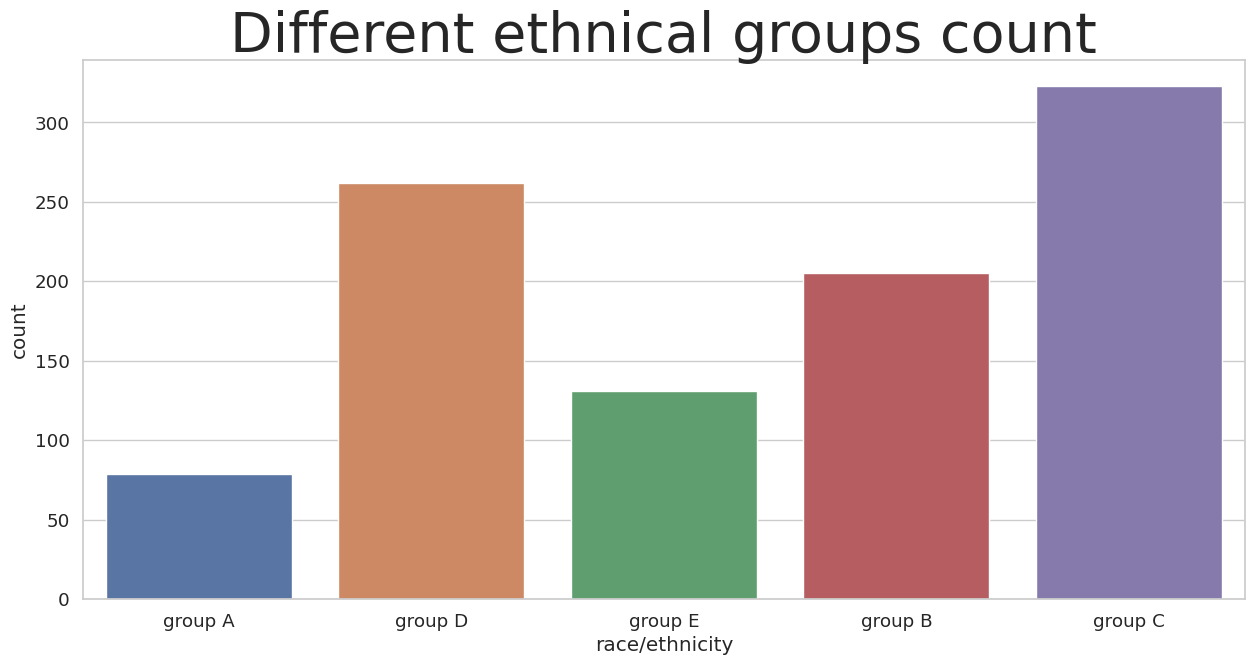

In [43]:
sns.countplot(df['race/ethnicity'])
plt.title('Different ethnical groups count', fontsize= 40)

Text(0.5, 1.0, 'How many students completed preparation course')

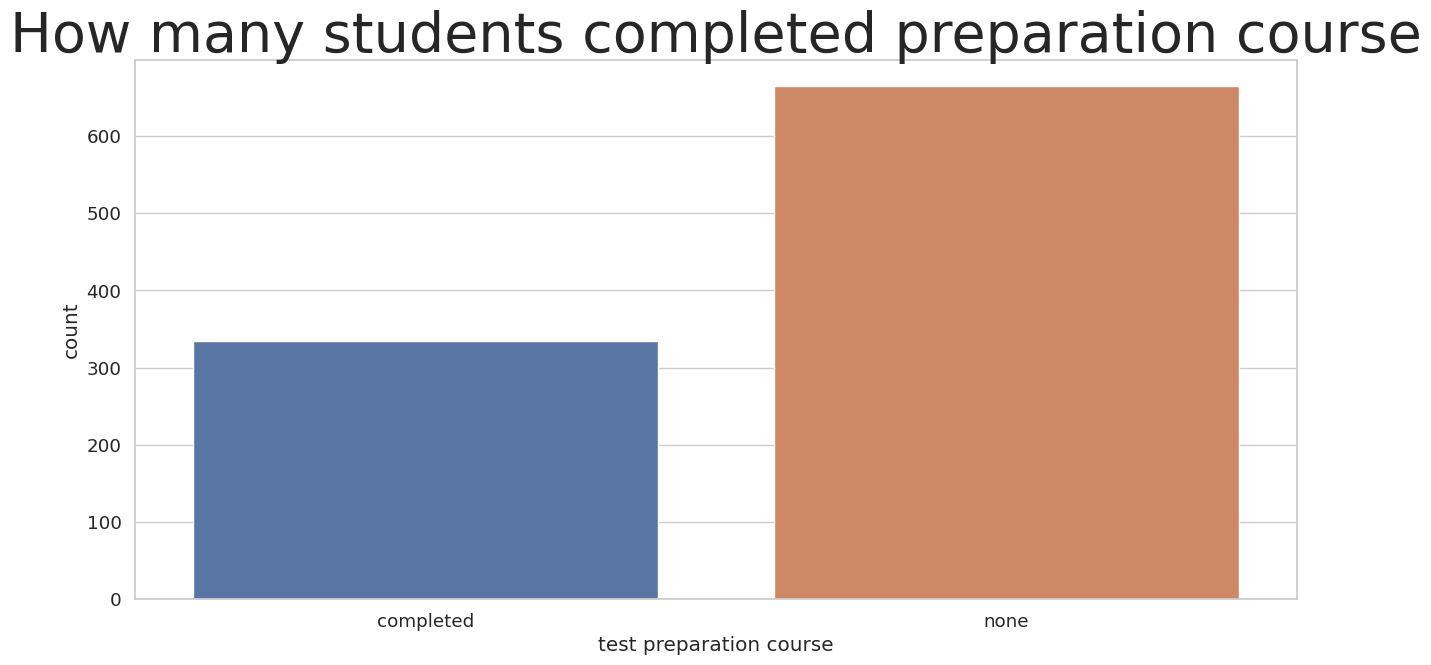

In [44]:
sns.countplot(df['test preparation course'])
plt.title('How many students completed preparation course', fontsize= 40)

Text(0.5, 1.0, 'How score is affected by preparation course')

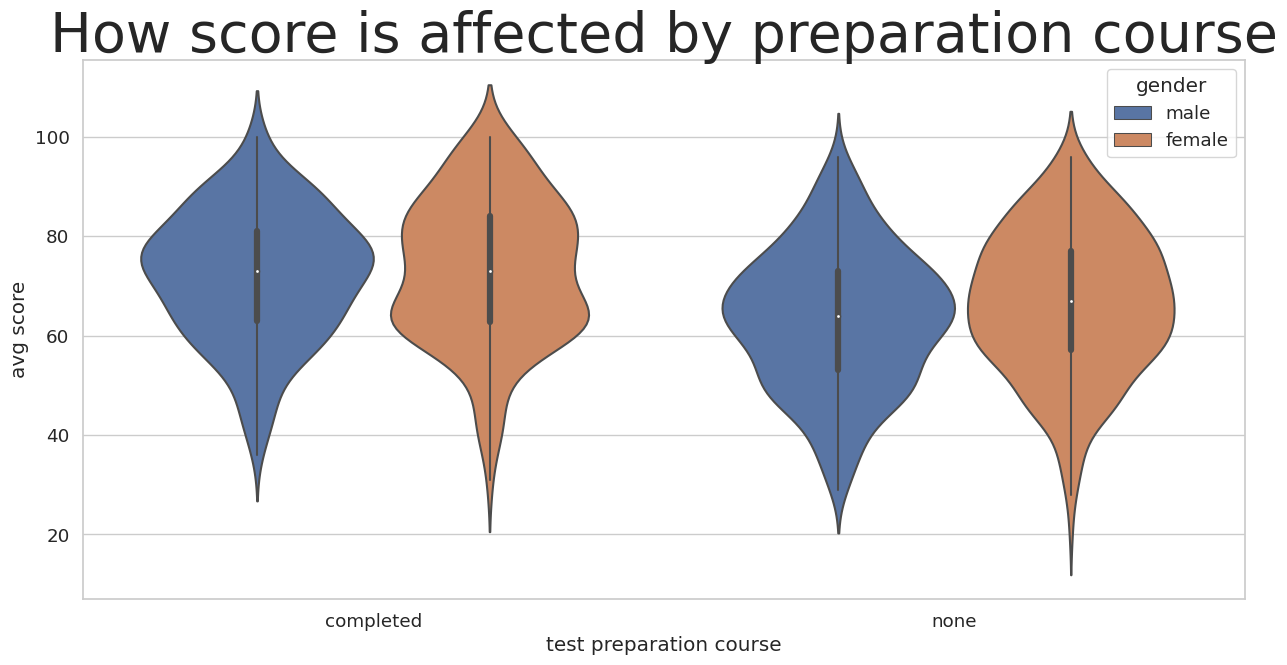

In [45]:
sns.violinplot(x= 'test preparation course', y= 'avg score', hue= 'gender', data= df)
plt.title('How score is affected by preparation course', fontsize= 40)

Text(0.5, 1.0, 'How ethnical group affect score')

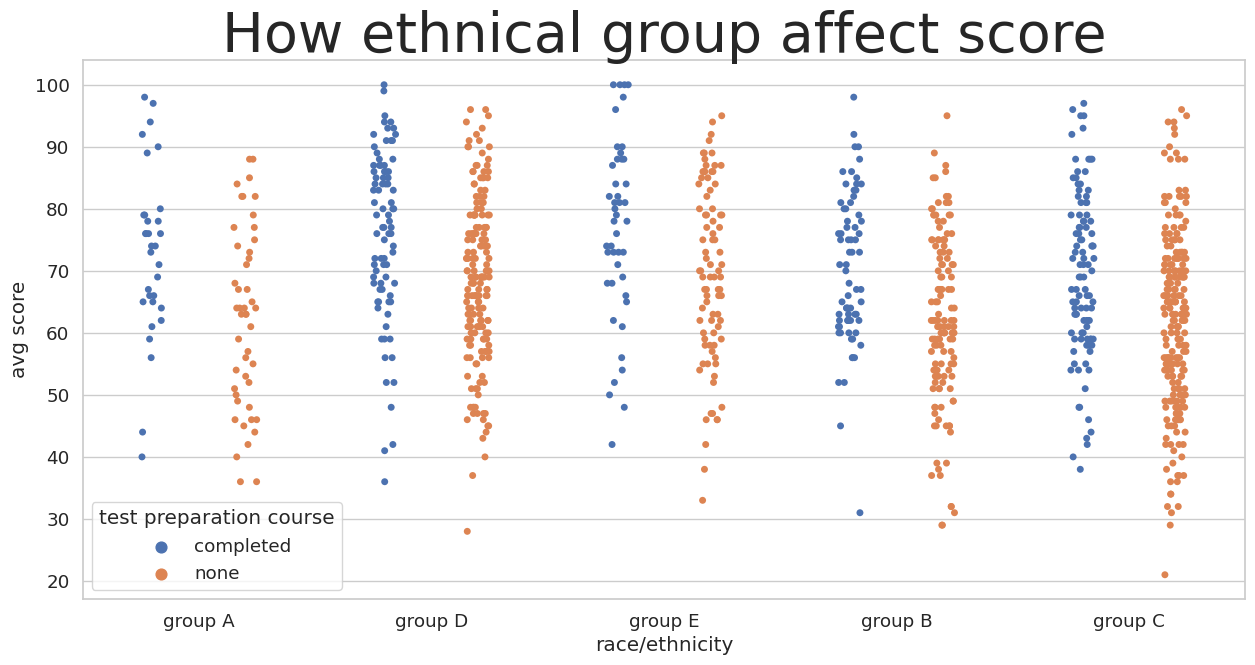

In [46]:
sns.stripplot(x= 'race/ethnicity', y= 'avg score', hue= 'test preparation course', dodge= True, data= df)
plt.title('How ethnical group affect score', fontsize= 40)